In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy, matplotlib

from scipy.fftpack import fft, ifft

In [2]:
data = pd.read_csv("E:\\Mine\\Kuliah\\OneDrive - Institut Teknologi Sepuluh Nopember\\SMT 8\\TA\\Ambil Data\\Amrizal\\amrizal.csv", names = ['ecg'])
fs = 125

## Plot ECG

In [3]:
data

ecg
0      0.360220
1      0.361831
2      0.346520
3      0.351355
4      0.377143
...         ...
13668  0.294139
13669  0.308645
13670  0.314286
13671  0.328791
13672  3.384600

[13673 rows x 1 columns]

In [4]:
#time = np.array(data["'Elapsed time'"])
sinyal = np.array(data["ecg"])
ndata = len(sinyal)

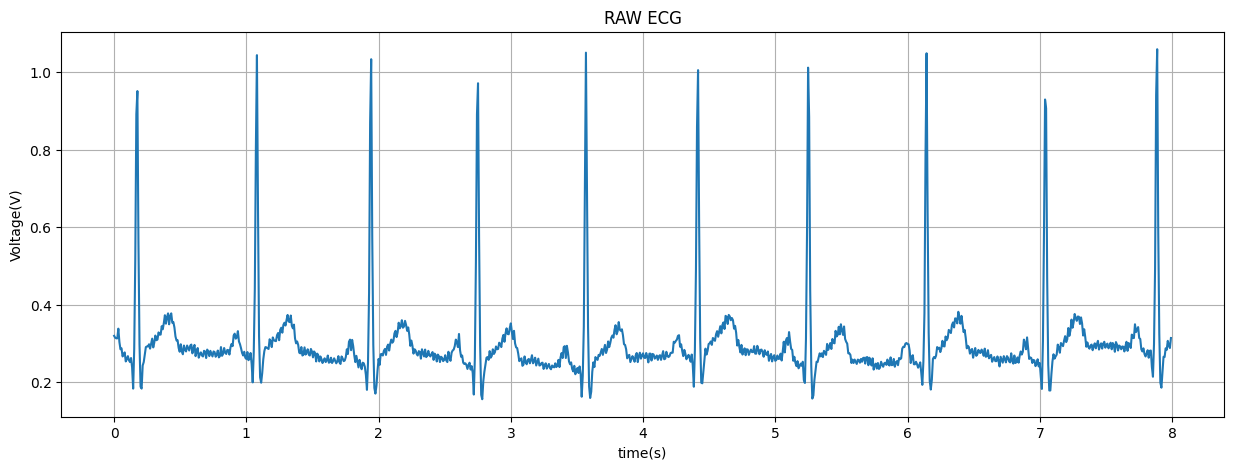

In [5]:
plt.figure(figsize = (15,5))
plt.plot(np.arange(len(sinyal[800:1800]))/fs, sinyal[800:1800]) 

plt.title('RAW ECG')
plt.xlabel('time(s)') 
plt.ylabel('Voltage(V)')
plt.grid()

In [11]:
w2fb1 = np.zeros(ndata)
w2fb2 = np.zeros(ndata)
w2fb3 = np.zeros(ndata)
gradien1 = np.zeros(ndata)
gradien2 = np.zeros(ndata)
gradien3 = np.zeros(ndata)

In [12]:
qj1 = [-2.0, 2.0]
qj2 = [-0.25, -0.75, -0.5, 0.5, 0.75, 0.25]
qj3 = [-0.03125, -0.09375, -0.1875, -0.3125, -0.34375, -0.28125, -0.125, 0.125, 0.28125, 0.34375, 0.3125, 0.1875, 0.09375, 0.03125]

In [13]:
for i in range(ndata):
    w2fb1[i] = qj1[0] * sinyal[i] +  qj1[1] * sinyal[i-1];
    w2fb2[i] = qj2[0] * sinyal[i] +  qj2[1] * sinyal[i-1] +  qj2[2] * sinyal[i-2] +  qj2[3] * sinyal[i-3] +  qj2[4] * sinyal[i-4] +  qj2[5] * sinyal[i-5];
    w2fb3[i] = qj3[0] * sinyal[i] +  qj3[1] * sinyal[i-1] +  qj3[2] * sinyal[i-2] +  qj3[3] * sinyal[i-3] +  qj3[4] * sinyal[i-4] +  qj3[5] * sinyal[i-5] +  qj3[6] * sinyal[i-6] +  qj3[7] * sinyal[i-7] +  qj3[8] * sinyal[i-8] +  qj3[9] * sinyal[i-9] +  qj3[10] * sinyal[i-10] +  qj3[11] * sinyal[i-11] +  qj3[12] * sinyal[i-12] +  qj3[13] * sinyal[i-13];

In [14]:
for i in range(ndata):
    gradien1[i] = w2fb1[i] - w2fb1[i-1]
    gradien2[i] = w2fb2[i] - w2fb2[i-2]
    gradien3[i] = w2fb3[i] - w2fb3[i-3]

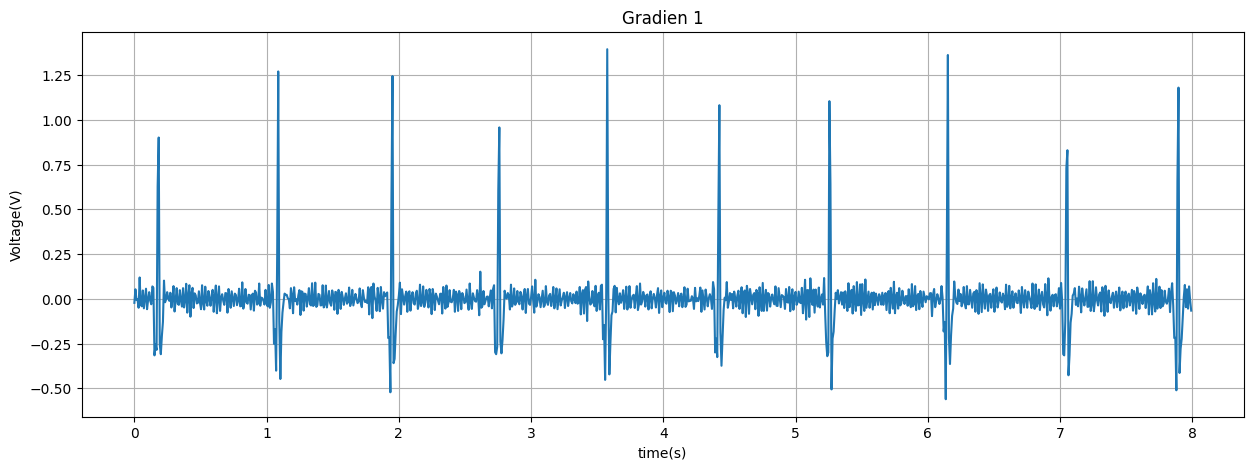

In [44]:
plt.figure(figsize = (15,5))
plt.plot(np.arange(len(gradien1[800:1800]))/fs, gradien1[800:1800]) 

plt.title('Gradien 1')
plt.xlabel('time(s)')
plt.ylabel('Voltage(V)')
plt.grid()

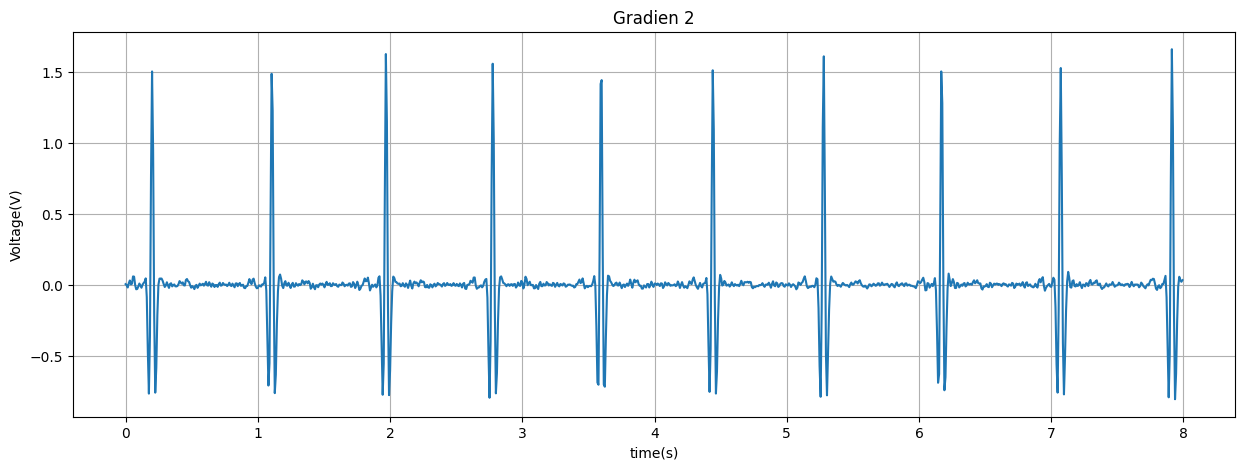

In [45]:
plt.figure(figsize = (15,5))
plt.plot(np.arange(len(gradien2[800:1800]))/fs, gradien2[800:1800]) 

plt.title('Gradien 2')
plt.xlabel('time(s)')
plt.ylabel('Voltage(V)')
plt.grid()

In [25]:
plt.figure(figsize = (15,5))
plt.plot(np.arange(len(gradien3[2000:3000]))/fs, gradien3[2000:3000]) 

plt.title('Gradien 3')
plt.xlabel('time(s)')
plt.ylabel('Voltage(V)')
plt.grid()

In [41]:
hasil_QRS = np.zeros(ndata)

In [42]:
for i in range(ndata):
    if (gradien1[i] > -1.5 and gradien2[i] > -1 and gradien3[i] > 0.3):
        hasil_QRS[i] = 1
    else:
        hasil_QRS[i] = 0

ValueError: x and y must have same first dimension, but have shapes (1000,) and (200,)

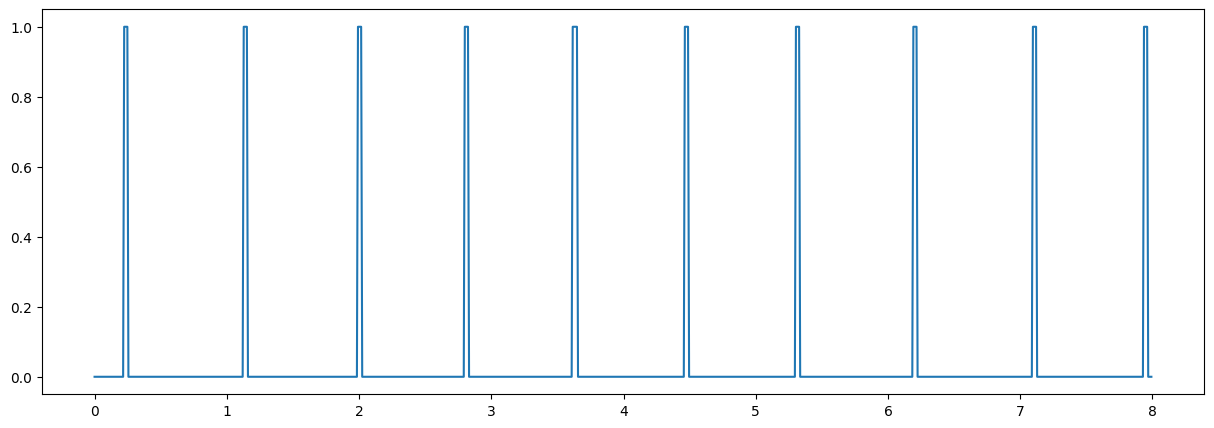

In [51]:
plt.figure(figsize = (15,5))
left = 800
right = 1800
n_data = right-left
n_array = np.arange(n_data)
t_array = n_array/fs

for sinyal in [hasil_QRS[left:right],sinyal[left:right]]:
    plt.plot(t_array,sinyal)
#plt.plot((np.arange(len(sinyal[2000:3000]))/fs, sinyal[2000:3000]))
#plt.plot((np.arange(len(sinyal[2000:3000]))/fs, sinyal[2000:3000]) )

plt.xlabel('time(s)')
plt.ylabel('Amplitudo(V)')
plt.grid()

In [56]:
k = []
for n in range(ndata-1):
    if hasil_QRS[n] == 0 and hasil_QRS[n+1] == 1:
        k.append(n)

rrinterval = np.zeros(len(k))
bpm = np.zeros(len(k))
for i in range(1, len(k)-1):
    rrinterval[i] = ((k[i]/fs)-(k[i-1]/fs))
    bpm[i] = 60/rrinterval[i]
bpm

array([  0.        , 144.23076923,  68.80733945,  72.11538462,
        67.56756757,  72.11538462,  68.18181818,  69.44444444,
        72.11538462,  69.44444444,  71.42857143,  75.75757576,
        72.11538462,  67.56756757,  71.42857143,  72.11538462,
        68.18181818,  64.1025641 ,  68.18181818,  69.44444444,
        66.37168142,  66.37168142,  70.09345794,  69.44444444,
        69.44444444,  73.52941176,  70.75471698,  67.56756757,
        71.42857143,  70.75471698,  67.56756757,  68.80733945,
        75.        ,  78.94736842,  85.22727273,  89.28571429,
        89.28571429,  84.26966292,  72.81553398,  66.37168142,
        69.44444444,  69.44444444,  66.96428571,  65.2173913 ,
        68.80733945,  70.09345794,  65.78947368,  64.65517241,
        69.44444444,  65.78947368,  64.1025641 ,  67.56756757,
        65.78947368,  64.1025641 ,  66.37168142,  68.18181818,
        63.02521008,  64.1025641 ,  67.56756757,  64.1025641 ,
        65.2173913 ,  68.80733945,  66.37168142,  65.78

In [57]:
RR = len(rrinterval)
RR_RMSSD=0
for n in range (2, RR-1):
    RR_RMSSD += ((rrinterval[n]-rrinterval[n-1])**2)

result_rmmsd = np.sqrt(RR_RMSSD/(RR-1))
result_rmmsd

0.09918944225342495

## pvRSA

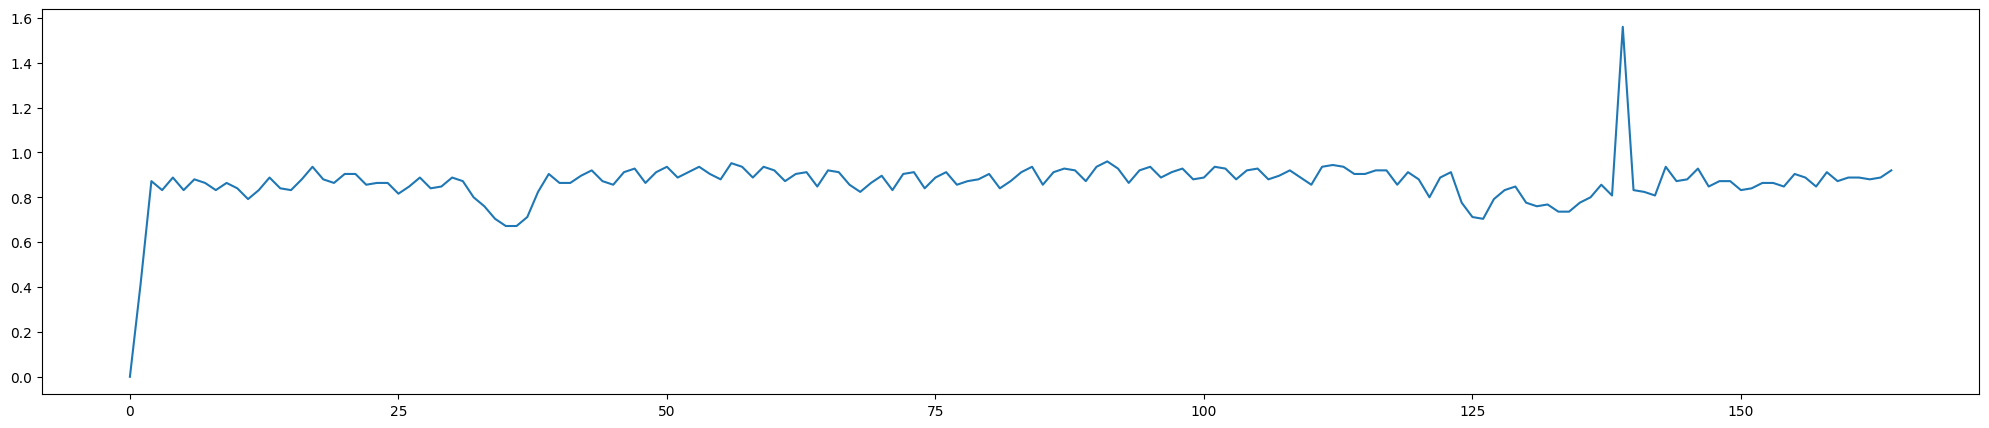

In [58]:
rrinterval
plt.figure(figsize = (25,5))
plt.plot(rrinterval[:-1])

In [59]:
rrinterval

array([0.   , 0.416, 0.872, 0.832, 0.888, 0.832, 0.88 , 0.864, 0.832,
       0.864, 0.84 , 0.792, 0.832, 0.888, 0.84 , 0.832, 0.88 , 0.936,
       0.88 , 0.864, 0.904, 0.904, 0.856, 0.864, 0.864, 0.816, 0.848,
       0.888, 0.84 , 0.848, 0.888, 0.872, 0.8  , 0.76 , 0.704, 0.672,
       0.672, 0.712, 0.824, 0.904, 0.864, 0.864, 0.896, 0.92 , 0.872,
       0.856, 0.912, 0.928, 0.864, 0.912, 0.936, 0.888, 0.912, 0.936,
       0.904, 0.88 , 0.952, 0.936, 0.888, 0.936, 0.92 , 0.872, 0.904,
       0.912, 0.848, 0.92 , 0.912, 0.856, 0.824, 0.864, 0.896, 0.832,
       0.904, 0.912, 0.84 , 0.888, 0.912, 0.856, 0.872, 0.88 , 0.904,
       0.84 , 0.872, 0.912, 0.936, 0.856, 0.912, 0.928, 0.92 , 0.872,
       0.936, 0.96 , 0.928, 0.864, 0.92 , 0.936, 0.888, 0.912, 0.928,
       0.88 , 0.888, 0.936, 0.928, 0.88 , 0.92 , 0.928, 0.88 , 0.896,
       0.92 , 0.888, 0.856, 0.936, 0.944, 0.936, 0.904, 0.904, 0.92 ,
       0.92 , 0.856, 0.912, 0.88 , 0.8  , 0.888, 0.912, 0.776, 0.712,
       0.704, 0.792,

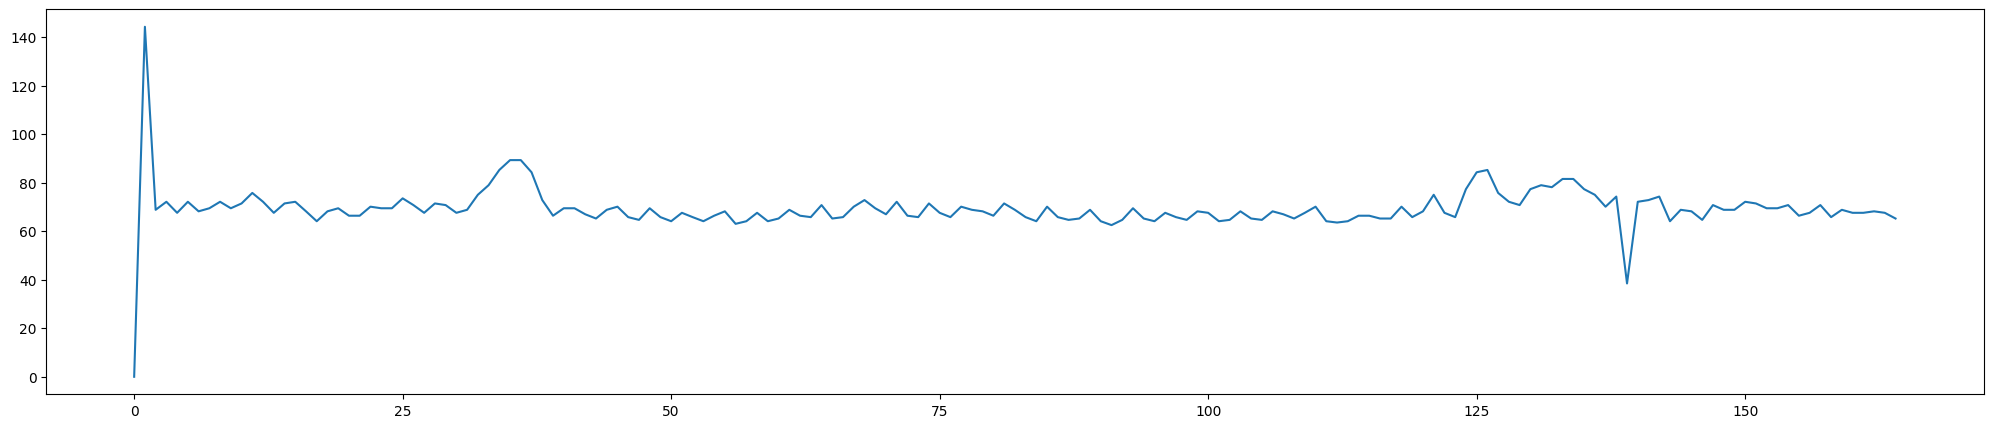

In [60]:
plt.figure(figsize = (25,5))
plt.plot(bpm[:-1])

In [61]:
RR_RSA = np.zeros(RR)
rrmin = np.zeros(RR)
for n in range (1, RR):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] < 0 :
        rrmin[n] = rrinterval[n]
rrmin

array([0.   , 0.   , 0.   , 0.832, 0.   , 0.832, 0.   , 0.864, 0.832,
       0.   , 0.84 , 0.792, 0.   , 0.   , 0.84 , 0.832, 0.   , 0.   ,
       0.88 , 0.864, 0.   , 0.   , 0.856, 0.   , 0.864, 0.816, 0.   ,
       0.   , 0.84 , 0.   , 0.   , 0.872, 0.8  , 0.76 , 0.704, 0.672,
       0.   , 0.   , 0.   , 0.   , 0.864, 0.864, 0.   , 0.   , 0.872,
       0.856, 0.   , 0.   , 0.864, 0.   , 0.   , 0.888, 0.   , 0.   ,
       0.904, 0.88 , 0.   , 0.936, 0.888, 0.   , 0.92 , 0.872, 0.   ,
       0.   , 0.848, 0.   , 0.912, 0.856, 0.824, 0.   , 0.   , 0.832,
       0.   , 0.   , 0.84 , 0.   , 0.   , 0.856, 0.   , 0.   , 0.   ,
       0.84 , 0.   , 0.   , 0.   , 0.856, 0.   , 0.   , 0.92 , 0.872,
       0.   , 0.   , 0.928, 0.864, 0.   , 0.   , 0.888, 0.   , 0.   ,
       0.88 , 0.   , 0.   , 0.928, 0.88 , 0.   , 0.   , 0.88 , 0.   ,
       0.   , 0.888, 0.856, 0.   , 0.   , 0.936, 0.904, 0.   , 0.   ,
       0.   , 0.856, 0.   , 0.88 , 0.8  , 0.   , 0.   , 0.776, 0.712,
       0.704, 0.   ,

In [62]:
rrmin_fix = rrmin[rrmin != 0]
mean_rrmin = np.mean(rrmin_fix)
mean_rrmin cx
# rrmin_fix

0.8471466666666667

In [63]:
rrmax = np.zeros(RR)
for n in range (len(k)-1):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] > 0 :
        rrmax[n] = rrinterval[n]
rrmax

array([0.   , 0.416, 0.872, 0.   , 0.888, 0.   , 0.88 , 0.   , 0.   ,
       0.864, 0.   , 0.   , 0.832, 0.888, 0.   , 0.   , 0.88 , 0.936,
       0.   , 0.   , 0.904, 0.904, 0.   , 0.864, 0.   , 0.   , 0.848,
       0.888, 0.   , 0.848, 0.888, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.672, 0.712, 0.824, 0.904, 0.   , 0.   , 0.896, 0.92 , 0.   ,
       0.   , 0.912, 0.928, 0.   , 0.912, 0.936, 0.   , 0.912, 0.936,
       0.   , 0.   , 0.952, 0.   , 0.   , 0.936, 0.   , 0.   , 0.904,
       0.912, 0.   , 0.92 , 0.   , 0.   , 0.   , 0.864, 0.896, 0.   ,
       0.904, 0.912, 0.   , 0.888, 0.912, 0.   , 0.872, 0.88 , 0.904,
       0.   , 0.872, 0.912, 0.936, 0.   , 0.912, 0.928, 0.   , 0.   ,
       0.936, 0.96 , 0.   , 0.   , 0.92 , 0.936, 0.   , 0.912, 0.928,
       0.   , 0.888, 0.936, 0.   , 0.   , 0.92 , 0.928, 0.   , 0.896,
       0.92 , 0.   , 0.   , 0.936, 0.944, 0.   , 0.   , 0.904, 0.92 ,
       0.92 , 0.   , 0.912, 0.   , 0.   , 0.888, 0.912, 0.   , 0.   ,
       0.   , 0.792,

In [64]:
rrmax_fix = rrmax[rrmax != 0]
mean_rrmax = np.mean(rrmax_fix)
mean_rrmax

0.8905454545454545

In [65]:
pvrsa = mean_rrmax - mean_rrmin
pvrsa

0.043398787878787815

## pvRSA 2

In [ ]:
rrmin1 = np.zeros(len(k))
for n in range (len(k)-1):
    if rrinterval[n] < 0.99 :
        rrmin1[n] = rrinterval[n]
rrmin1

In [ ]:
rrmin_fix = rrmin1[rrmin1 != 0]
mean_rrmin1 = np.mean(rrmin_fix)
mean_rrmin1

In [ ]:
rrmax1 = np.zeros(RR)
for n in range (1, RR):
    if rrinterval[n] > 0.99 :
        rrmax1[n] = rrinterval[n]
rrmax1

In [ ]:
rrmax_fix = rrmax1[rrmax1 != 0]
mean_rrmax1 = np.mean(rrmax_fix)
mean_rrmax1

In [ ]:
pvrsa1 = mean_rrmax1 - mean_rrmin1
pvrsa1